# K-Means

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

import seaborn as sn

# Load Data

In [3]:
df = pd.read_csv("./data/data.csv")

df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# plot some data

Text(0, 0.5, 'Income')

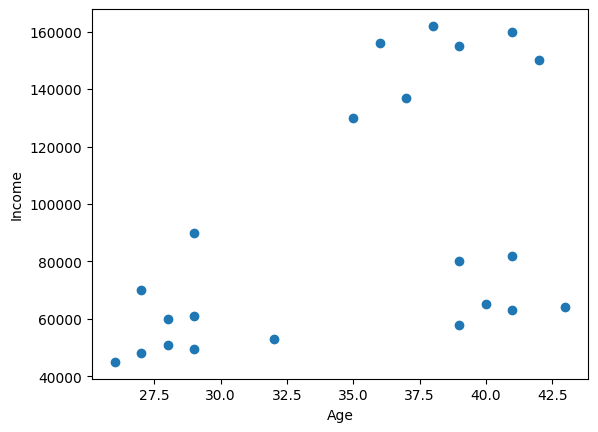

In [4]:
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")

# Pair Plot

c:\Python\Python3114\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


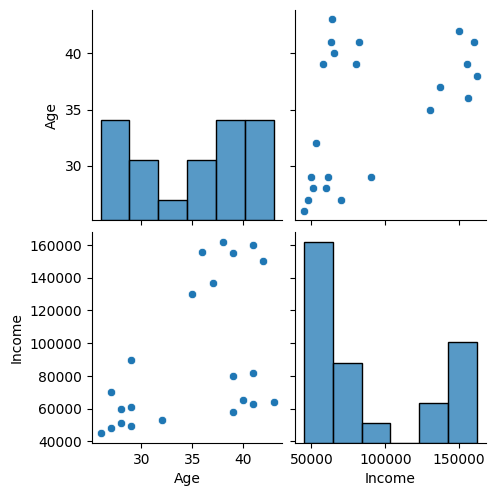

In [5]:
sn.pairplot(df)

# Build and train the model



In [6]:
# Create model instance
model = KMeans(n_clusters= 3)

# Train the model (fit) and assign the clusters to rows (predict)
y_predicted  = model.fit_predict(df[["Age", "Income"]])

y_predicted


c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)


,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0
9,Angelina,35,130000,1
8,Brad,36,156000,1
7,Andrea,38,162000,1
10,Donald,37,137000,1
5,Gautam,39,155000,1
4,Kory,42,150000,1


# Centroids

In [11]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

# Inertia

In [12]:
model.inertia_

1577046058.8831167

# Split the clusters into 3x different df

In [13]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

# Plot the clusters

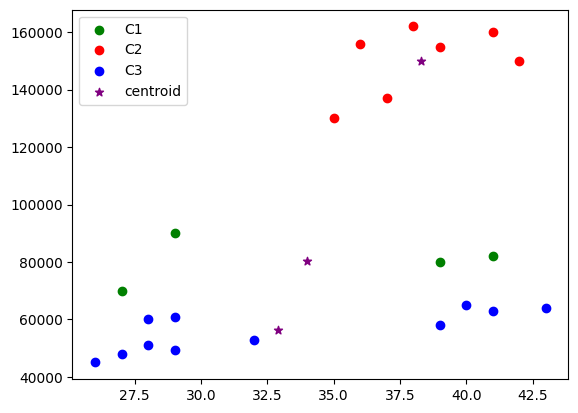

In [16]:
plt.scatter(df1["Age"], df1["Income"], color = "green", label = "C1")
plt.scatter(df2["Age"], df2["Income"], color = "red", label = "C2")
plt.scatter(df3["Age"], df3["Income"], color = "blue", label = "C3")


plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

# Normalization of the data 

scale the data to range of from 0-1

In [20]:
# create a scaler
scaler = MinMaxScaler(feature_range= (0,1)) # feature_range between 0 and 1


# Scale the age
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])


# Scale the income
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])




df.head(15)


,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
9,Angelina,0.529412,0.726496,1
8,Brad,0.588235,0.948718,1
7,Andrea,0.705882,1.000000,1
10,Donald,0.647059,0.786325,1
5,Gautam,0.764706,0.940171,1
4,Kory,0.941176,0.897436,1


# Retrain the model using the normalized data

In [21]:
# Create model instance
model = KMeans(n_clusters= 3)

# Train the model (fit) and assign the clusters to rows (predict)
y_predicted  = model.fit_predict(df[["Age", "Income"]])

y_predicted

c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [22]:
# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
21,Abdul,0.764706,0.111111,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
17,Priyanka,0.882353,0.153846,0
16,Dipika,0.823529,0.170940,0
15,Ranbir,0.352941,0.068376,1
14,Stark,0.176471,0.038462,1
13,Jared,0.117647,0.051282,1
12,Arnold,0.058824,0.025641,1


In [23]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

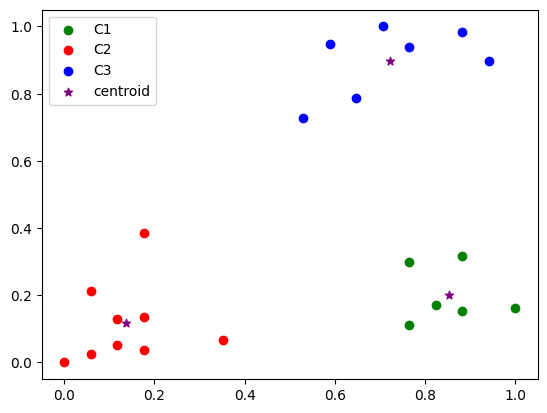

In [24]:
plt.scatter(df1["Age"], df1["Income"], color = "green", label = "C1")
plt.scatter(df2["Age"], df2["Income"], color = "red", label = "C2")
plt.scatter(df3["Age"], df3["Income"], color = "blue", label = "C3")


plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

In [25]:
model.inertia_

0.4750783498553095

# How to find the right K-Value (number of clusters) ?

## 1. Elbow Method

In [26]:
list_of_inertia_sse = []

k_range = range(2, 10)

for k in k_range:

    model = KMeans(n_clusters= k)

    model.fit(df[["Age", "Income"]])

    list_of_inertia_sse.append(model.inertia_)

    



c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

Text(0, 0.5, 'Error')

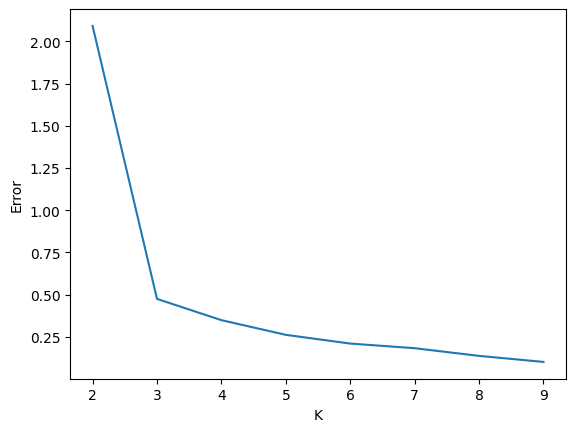

In [27]:
plt.plot(k_range, list_of_inertia_sse)
plt.xlabel("K")
plt.ylabel("Error")

# 2 Silhouete Score  
- (+1) Best - 0 (Boundry) - (-1) Worst

In [30]:
list_of_silhouete_scores = []

k_range = range(2, 10)

for k in k_range:

    model = KMeans(n_clusters= k)

    model.fit(df[["Age", "Income"]])

    s_score = silhouette_score(df[["Age", "Income"]], model.labels_)

    list_of_silhouete_scores.append(s_score)

c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

Text(0, 0.5, 's_score')

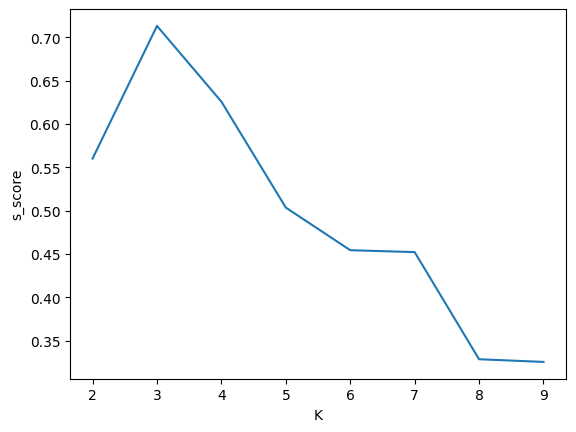

In [31]:
plt.plot(k_range, list_of_silhouete_scores)
plt.xlabel("K")
plt.ylabel("s_score")